In [1]:
# Titanic EDA and Prediction Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('train.csv')
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [4]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)


In [5]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])


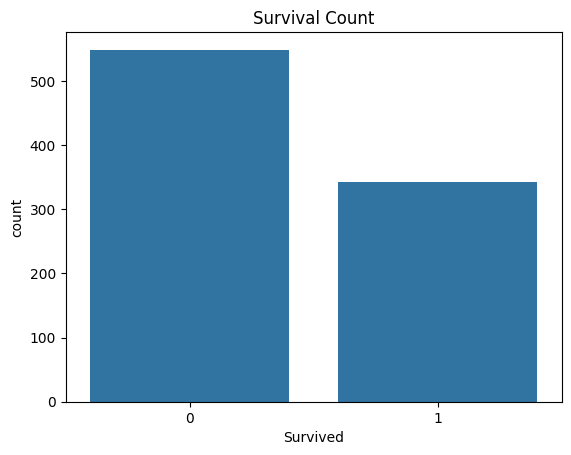

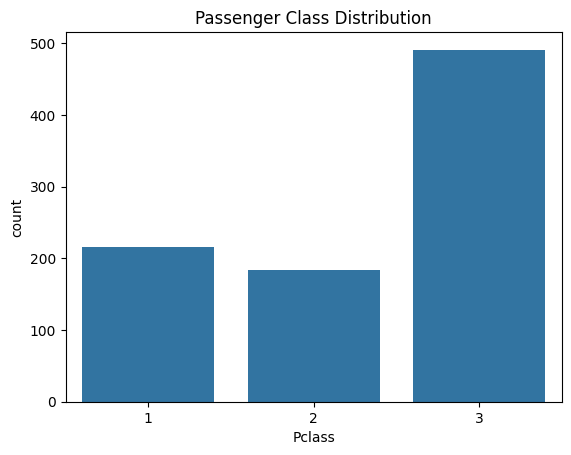

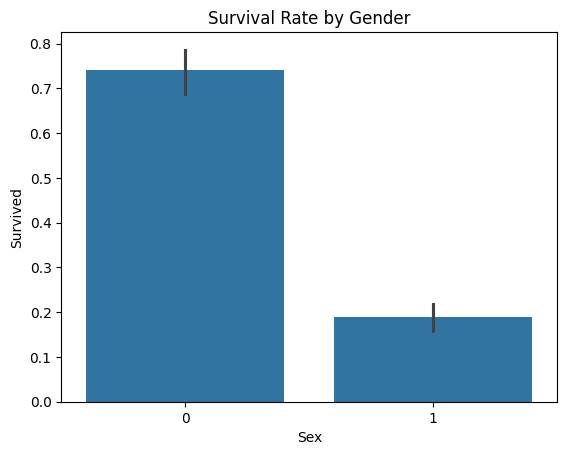

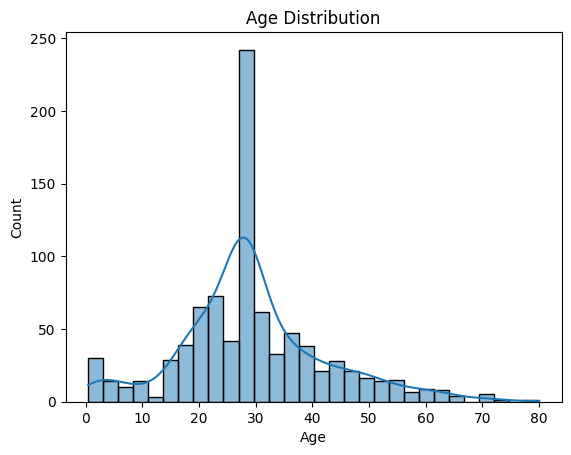

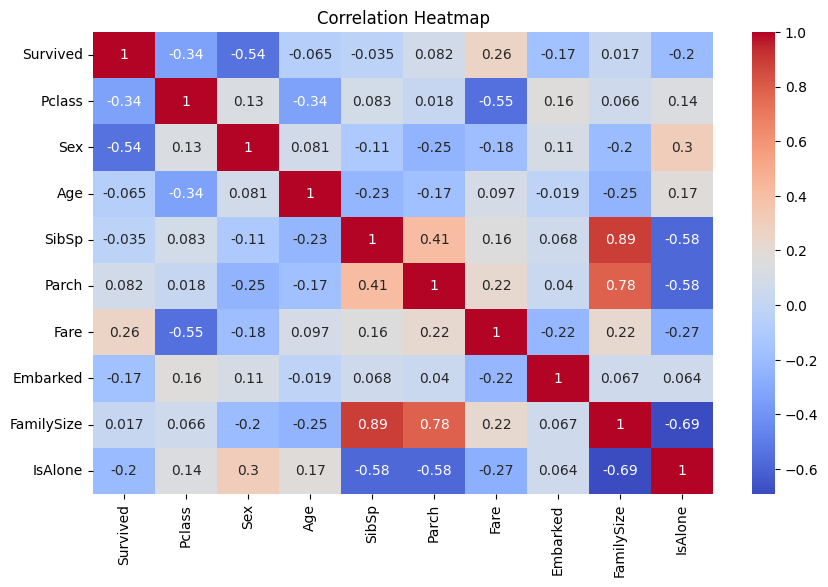

In [6]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", report)


Model Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [9]:
print("\nKey Insights:")
print("1. Females had a much higher survival rate than males.")
print("2. Passengers in 1st class were more likely to survive.")
print("3. Younger passengers had better survival chances.")
print("4. Passengers traveling alone were less likely to survive.")
print("5. Logistic Regression gave an accuracy of {:.2f}%".format(accuracy * 100))



Key Insights:
1. Females had a much higher survival rate than males.
2. Passengers in 1st class were more likely to survive.
3. Younger passengers had better survival chances.
4. Passengers traveling alone were less likely to survive.
5. Logistic Regression gave an accuracy of 79.89%
